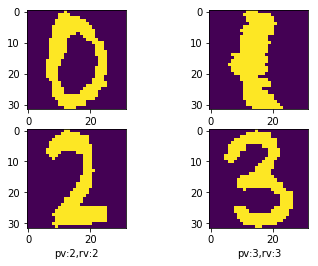

In [6]:
#! /usr/bin/env python
# -*- coding:utf-8 -*-

"""
基于knn算法的手写数字识别
"""

from os import listdir

import matplotlib.pyplot as plt
import numpy as np

from img import img2mat, img2vector, show_img
from knn import classify

train_digits_path = '/home/user/digits/trainingDigits/'
test_digits_path = '/home/user/digits/testDigits/'


def read_dataSet(path):
    file_list = listdir(path)
    # 获取文件夹下的所有文件路径
    num_files = len(file_list)
    # 统计文件数目
    dataset = np.zeros([num_files, 1024], int)
    # 用于存放所有的数字文件
    labels = np.zeros([num_files])
    # 用于存放对应的标签
    for i in range(num_files):
        # 遍历所有的文件
        file_path = file_list[i]
        # 获取文件名称
        digit = int(file_path.split('_')[0])
        # 通过文件名获取标签
        labels[i] = digit
        # 存放标签
        dataset[i] = img2vector(path + '/' + file_path)
        # 存放数据
    return dataset, labels


# 读取训练集
train_dataset, train_labels = read_dataSet(train_digits_path)

# 读取测试集
test_dataset, test_labels = read_dataSet(test_digits_path)


def classify_test_dataset(k):
    # 对测试集进行识别
    test_num = len(test_dataset)
    # 测试集的数目
    error_num = 0
    # 错误数目
    for data, label in zip(test_dataset, test_labels):
        res = classify(data, train_dataset, train_labels, k)
        # 对测试集进行预测
        if res != label:
            error_num += 1
        # 若预测错误，则计数器加一
    print("total:{}，error num:{},error rate:{}".format(test_num, \
                            error_num, error_num / test_num))


def classify_test_data(filename):
    # 对测试集合，单个文件进行识别
    file_path = test_digits_path + filename
    try:
        data = img2vector(file_path)
        res = classify(data, train_dataset, train_labels, 3)
        return int(res)
    except FileNotFoundError:
        print("No such file.")


if __name__ == '__main__':
    # 测试
    mats = []
    vs = []
    for idx in range(4):
        filename = str(idx) + '_2.txt'
        mat = img2mat(test_digits_path + filename)
        mats.append(mat)
        pv = classify_test_data(filename)
        rv = int(filename.split('_')[0])
        vs.append([pv,rv])

    for i in range(len(mats)):
        pv,rv = vs[i]
        plt.subplot(2,2,i+1)
        plt.xlabel("pv:"+str(pv)+",rv:"+str(rv))
        plt.imshow(mats[i])
    plt.show()    
    
  